# Important librarys

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.pyplot import figure

In [8]:
#Create a path to where your data is stored.
path = r'D:\WORK\Bootcamp\Machine Learning\Achievement 1\Project\Data'

In [9]:
# Read the CSV file
df = pd.read_csv(os.path.join(path, "Original", 'Dataset-weather-prediction-dataset-processed.csv'))

In [10]:
df.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [37]:
df.columns

Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_humidity', 'VALENTIA_pressure', 'VALENTIA_global_radiation',
       'VALENTIA_precipitation', 'VALENTIA_snow_depth', 'VALENTIA_sunshine',
       'VALENTIA_temp_mean', 'VALENTIA_temp_min', 'VALENTIA_temp_max', 'YEAR'],
      dtype='object', length=171)

In [11]:
## map each iris species number to a name with a dictionary.
#iris_class = {0:'Iris-setosa', 1:'Iris-versicolor', 2:'Iris-virginica'}
#df['species_name'] = [iris_class[i] for i in df.species]

In [12]:
# List of selected years
selected_years = list(range(1980, 1989))

# Ensure DATE column is a string to extract the first four digits
df['YEAR'] = df['DATE'].astype(str).str[:4].astype(int)

# Filter the DataFrame for rows in the selected years
filtered_df = df[df['YEAR'].isin(selected_years)]

In [13]:
# filtered_df = filtered_df.drop(columns=['DATE', 'MONTH'], inplace=True)

# Dendrogram

C:\Users\Oa\AppData\Local\Temp\ipykernel_29524\2712731897.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=['DATE', 'MONTH'], inplace=True)


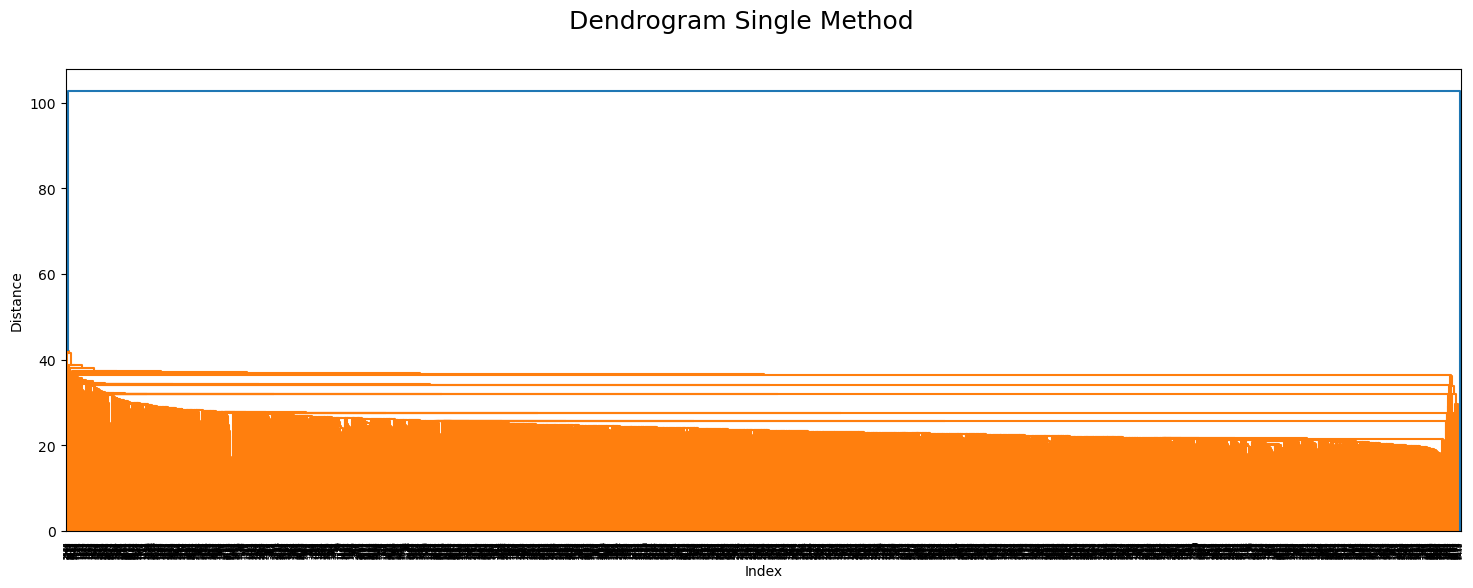

In [14]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Correctly drop columns without reassignment
filtered_df.drop(columns=['DATE', 'MONTH'], inplace=True)

# Perform the linkage operation
from scipy.cluster.hierarchy import linkage
distance_single = linkage(filtered_df, method="single")

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method", fontsize=18)
plt.show()

In [15]:
#df_scaled = pd.read_csv(os.path.join(path, "Prepared", 'Data_scaled_v2.csv'))

In [16]:
#df_scaled = df_scaled.drop(columns='Unnamed: 0')

In [17]:
scaler = StandardScaler()

In [18]:
from sklearn.preprocessing import StandardScaler

# Step 6: Scale the dataset
# Assuming 'DATE' and 'MONTH' are columns to exclude from scaling
features_to_scale = [col for col in filtered_df.columns if col not in ['DATE', 'MONTH']]

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
filtered_df[features_to_scale] = scaler.fit_transform(filtered_df[features_to_scale])

# Create a scaled DataFrame if needed
df_scaled = filtered_df[features_to_scale] 

# Display the scaled DataFrame
print(df_scaled.head())

      BASEL_cloud_cover  BASEL_wind_speed  BASEL_humidity  BASEL_pressure  \
7305           0.195821     -4.440892e-16        0.675678       -0.002244   
7306          -0.209632     -4.440892e-16        0.774814       -0.002244   
7307           1.006725     -4.440892e-16        0.378271       -0.002244   
7308           1.006725     -4.440892e-16        1.766171       -0.002244   
7309           1.006725     -4.440892e-16        1.369628       -0.002244   

      BASEL_global_radiation  BASEL_precipitation  BASEL_snow_depth  \
7305               -0.954748            -0.445923          2.398200   
7306               -1.023109            -0.278260          2.070207   
7307               -0.909174            -0.320176          2.726193   
7308               -1.205404             0.434310          2.726193   
7309               -1.125649             0.078025          2.398200   

      BASEL_sunshine  BASEL_temp_mean  BASEL_temp_min  ...  VALENTIA_humidity  \
7305       -0.629667        -

C:\Users\Oa\AppData\Local\Temp\ipykernel_29524\2245062629.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[features_to_scale] = scaler.fit_transform(filtered_df[features_to_scale])


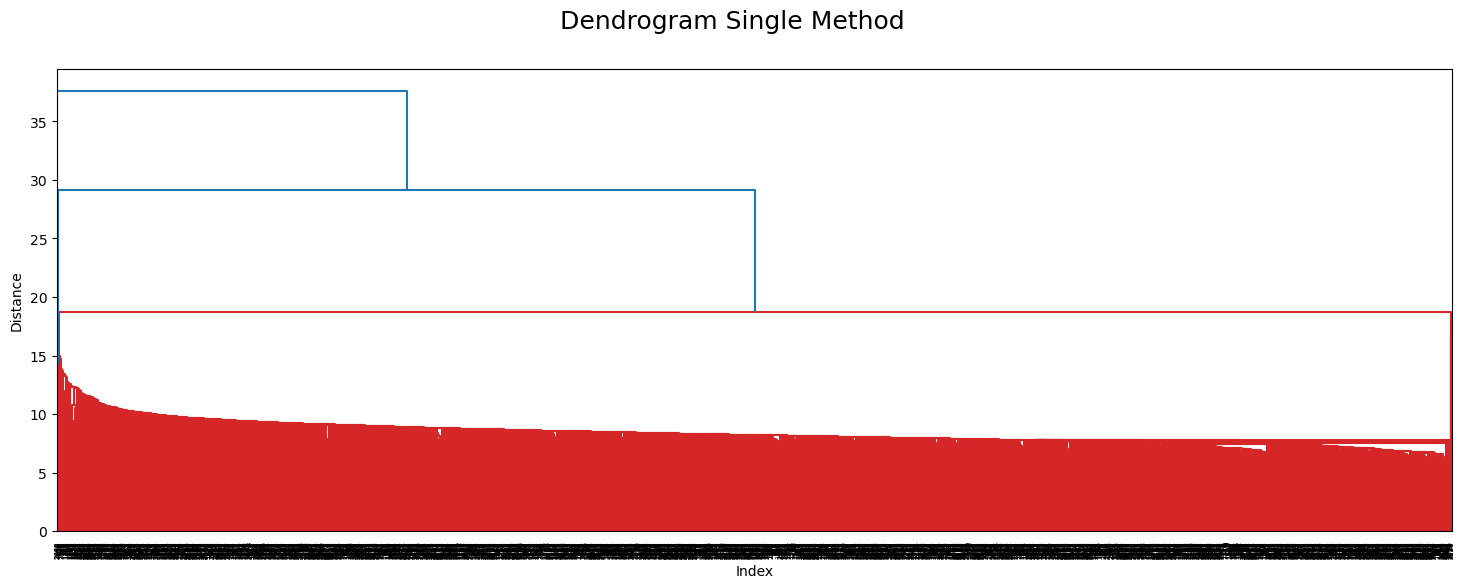

In [19]:
# Perform the linkage operation
from scipy.cluster.hierarchy import linkage
distance_single = linkage(df_scaled, method="single")

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Single Method", fontsize=18)
plt.show()

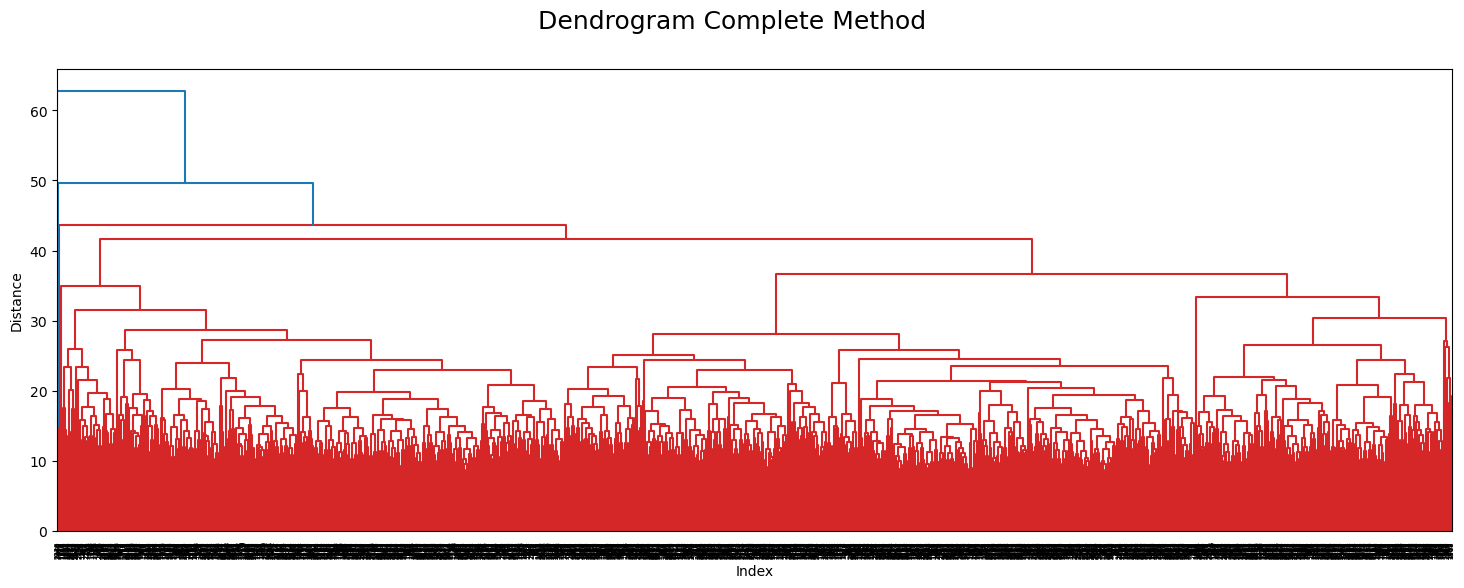

In [20]:
# Perform the linkage operation
from scipy.cluster.hierarchy import linkage
distance_single = linkage(df_scaled, method="complete")

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Complete Method", fontsize=18)
plt.show()

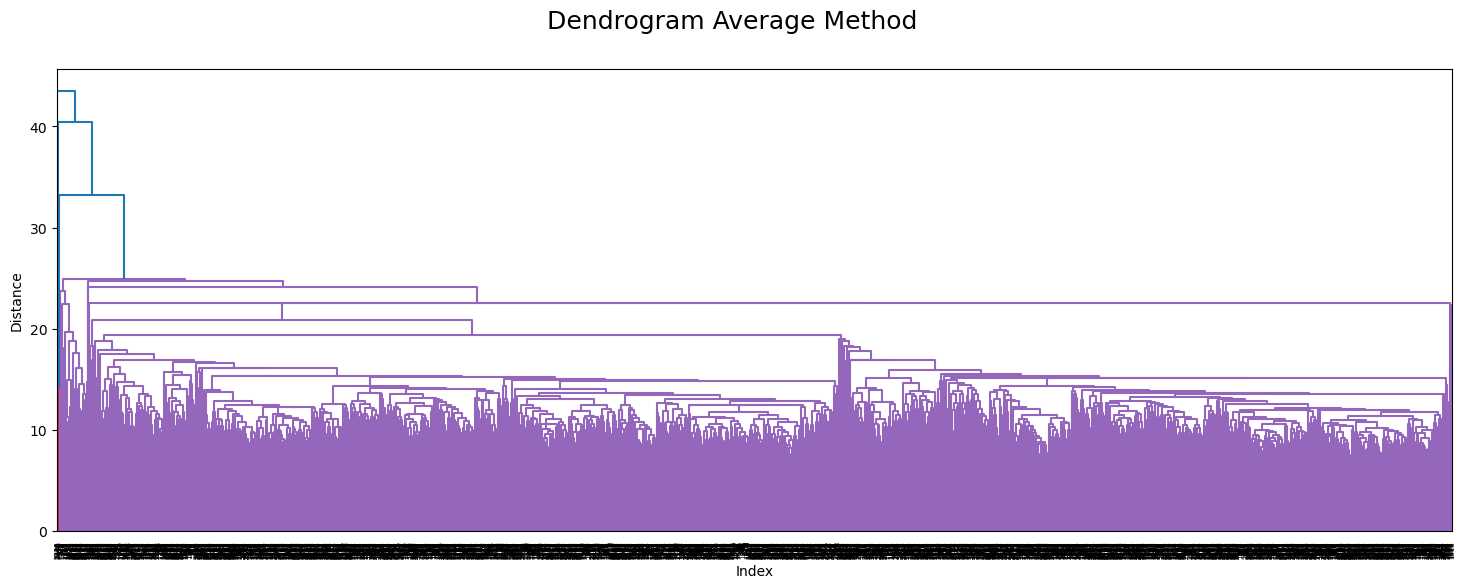

In [21]:
# Perform the linkage operation
from scipy.cluster.hierarchy import linkage
distance_single = linkage(df_scaled, method="average")

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Average Method", fontsize=18)
plt.show()

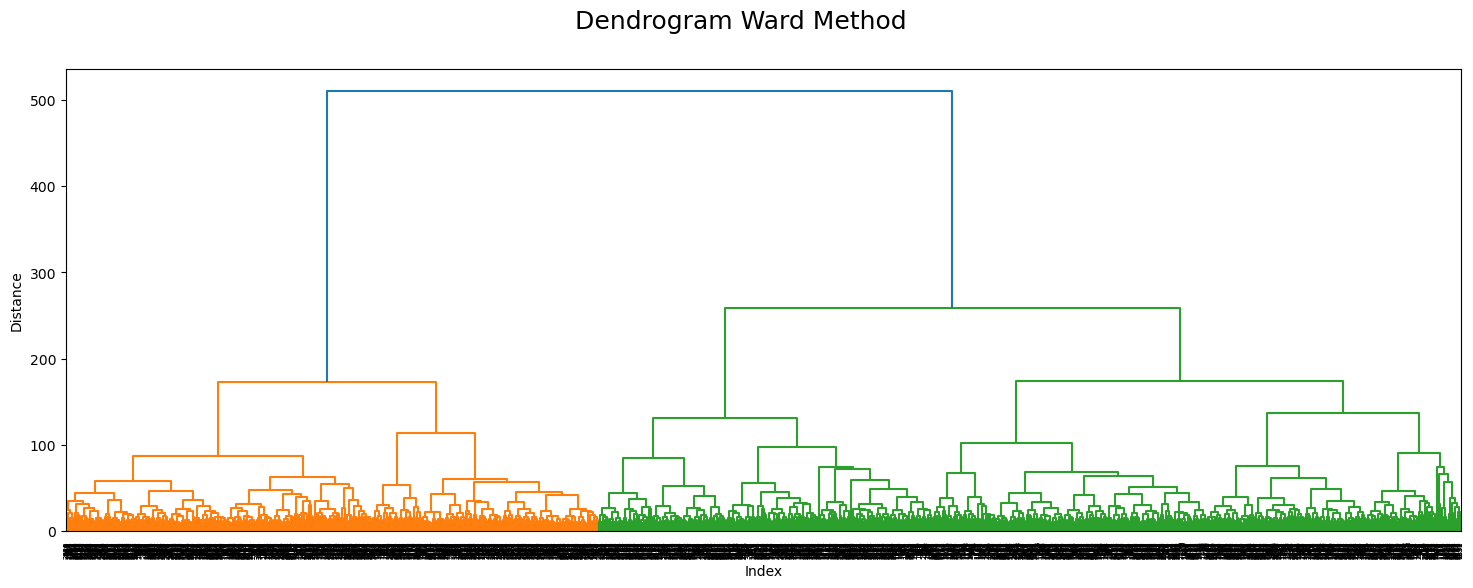

In [22]:
# Perform the linkage operation
from scipy.cluster.hierarchy import linkage
distance_single = linkage(df_scaled, method="ward")

# Plot the dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 6))
dendrogram(distance_single, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("Dendrogram Ward Method", fontsize=18)
plt.show()

# PCA

In [23]:
#Run the PCA model, reducing to nine components
pca = PCA(n_components=9)
principalComponents = pca.fit_transform(df_scaled)

In [24]:
principalComponents

array([[10.76892202,  1.91492043,  1.71334797, ...,  2.0829462 ,
        -1.7935581 , -1.42154494],
       [11.13187767, -1.09266109,  1.11492182, ...,  0.7478227 ,
        -1.76527682, -0.36770437],
       [12.21949401, -1.97189105, -0.50045565, ...,  2.87221521,
        -2.36456002,  2.28059445],
       ...,
       [ 6.53523146, -4.68432727, -8.75282114, ..., -1.41795821,
         1.47645188,  0.12062047],
       [ 7.16911386, -4.45260563, -8.71170594, ..., -0.51118566,
         1.834042  , -1.64363567],
       [ 7.82233   , -4.57122931, -8.02416308, ..., -0.21032291,
         2.22744927,  0.69823551]])

In [25]:
import pandas as pd
# Make a DataFrame of the new components
dfPCA = pd.DataFrame(principalComponents, columns=[f'PCA{i+1}' for i in range(9)])

# Display the new DataFrame
print(dfPCA.head())

        PCA1      PCA2      PCA3      PCA4      PCA5      PCA6      PCA7  \
0  10.768922  1.914920  1.713348 -0.721283  1.515787  0.496478  2.082946   
1  11.131878 -1.092661  1.114922 -2.959882  1.443585  0.378965  0.747823   
2  12.219494 -1.971891 -0.500456 -1.247148  2.805631  1.673755  2.872215   
3  12.221722  0.794398 -0.938267  2.993156  4.043045  0.557067  0.583135   
4  10.548377  2.770616 -0.719200  0.550309  0.837866  0.661536 -0.890862   

       PCA8      PCA9  
0 -1.793558 -1.421545  
1 -1.765277 -0.367704  
2 -2.364560  2.280594  
3  0.564273  1.516345  
4 -0.711274  0.754213  


In [26]:
dfPCA 

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9
0,10.768922,1.914920,1.713348,-0.721283,1.515787,0.496478,2.082946,-1.793558,-1.421545
1,11.131878,-1.092661,1.114922,-2.959882,1.443585,0.378965,0.747823,-1.765277,-0.367704
2,12.219494,-1.971891,-0.500456,-1.247148,2.805631,1.673755,2.872215,-2.364560,2.280594
3,12.221722,0.794398,-0.938267,2.993156,4.043045,0.557067,0.583135,0.564273,1.516345
4,10.548377,2.770616,-0.719200,0.550309,0.837866,0.661536,-0.890862,-0.711274,0.754213
...,...,...,...,...,...,...,...,...,...
3283,5.587893,-1.285673,-6.465599,0.305566,-0.284739,-1.077104,-1.774169,1.110405,-0.630436
3284,6.516030,-2.920362,-7.369024,-0.715259,-1.529581,0.608111,-0.808550,0.996307,-0.351364
3285,6.535231,-4.684327,-8.752821,0.222574,-1.934743,1.009729,-1.417958,1.476452,0.120620
3286,7.169114,-4.452606,-8.711706,-1.050897,-0.540617,0.626050,-0.511186,1.834042,-1.643636


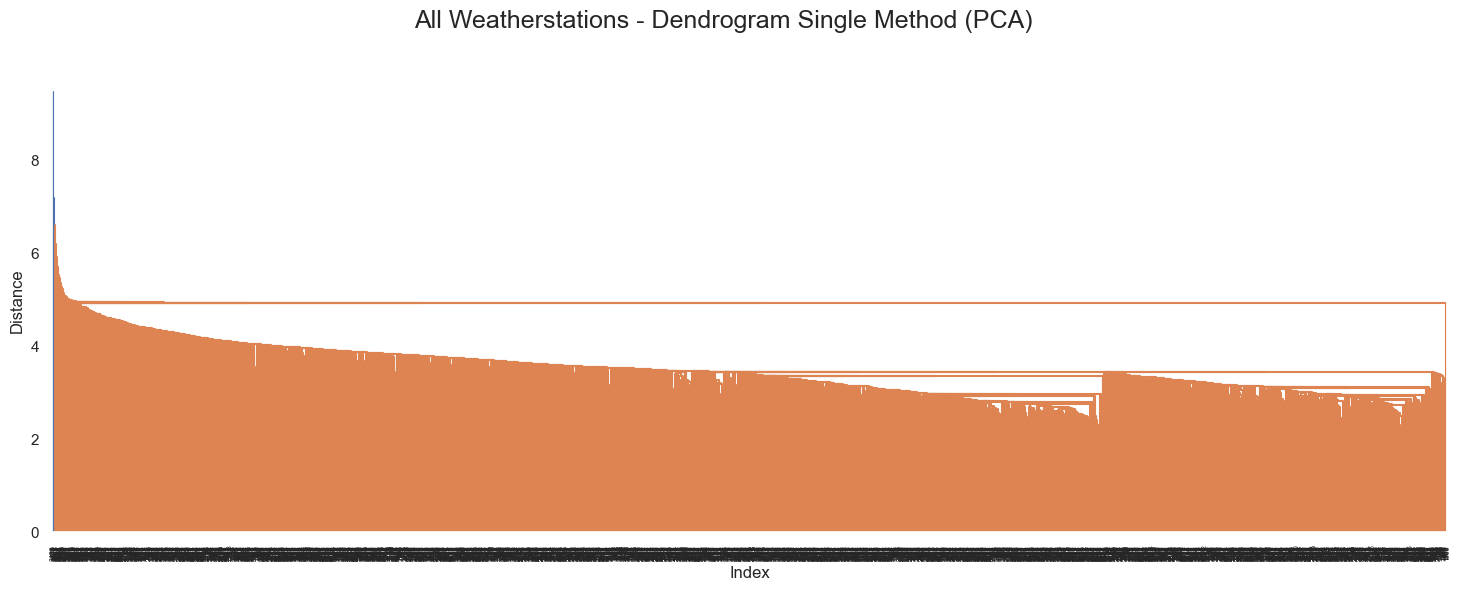

In [31]:
distance_ward = linkage(dfPCA, method="single")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Single Method (PCA) ",fontsize=18)

# Display the plot
plt.show()

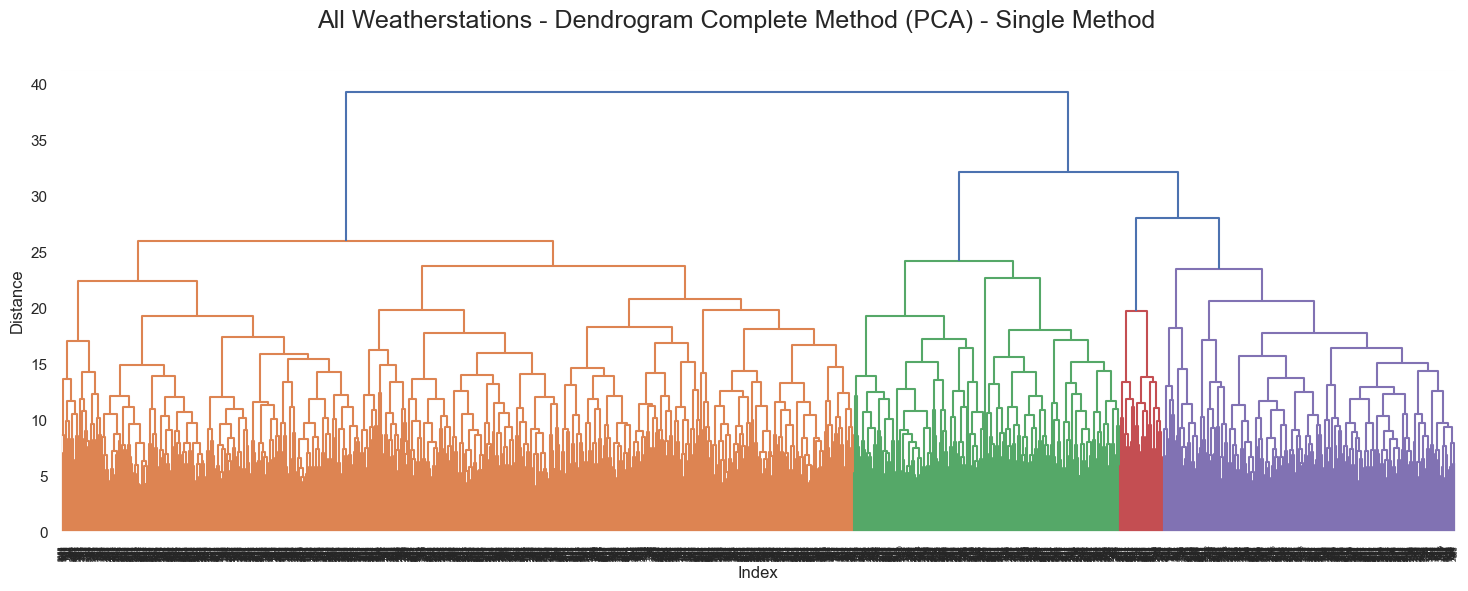

In [32]:
distance_ward = linkage(dfPCA, method="complete")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Complete Method (PCA) - Single Method",fontsize=18)

# Display the plot
plt.show()

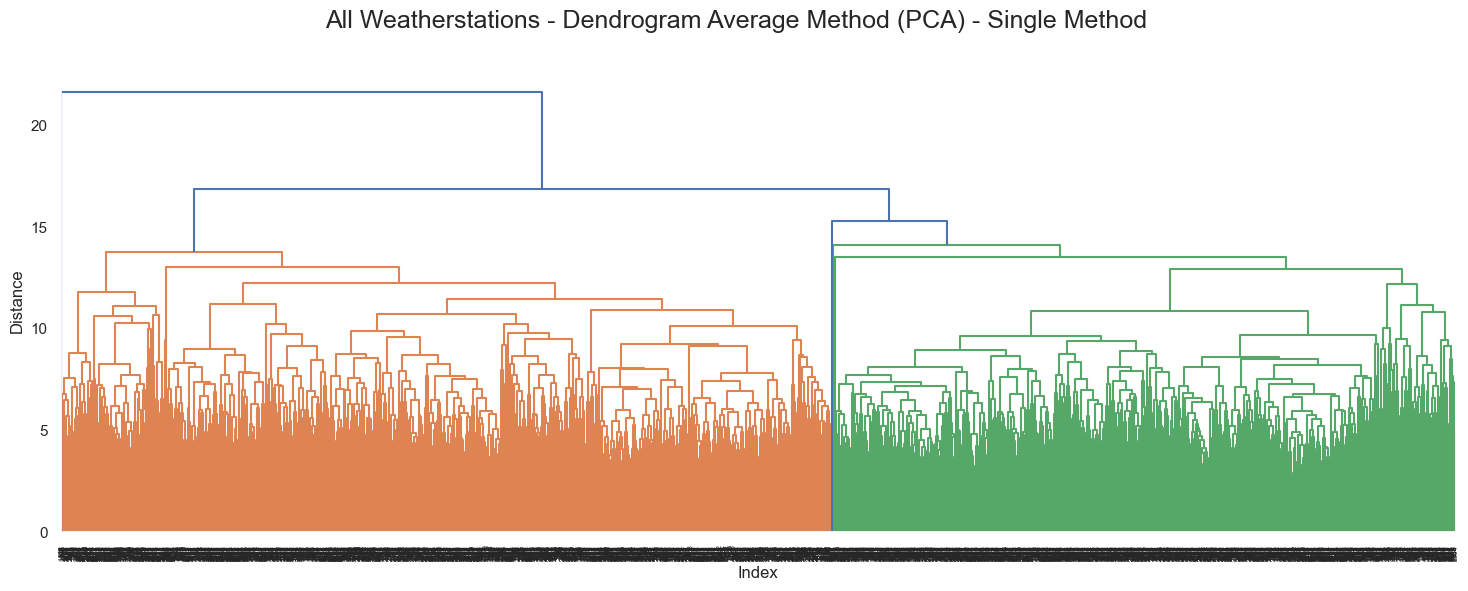

In [33]:
distance_ward = linkage(dfPCA, method="average")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Average Method (PCA) - Single Method",fontsize=18)

# Display the plot
plt.show()

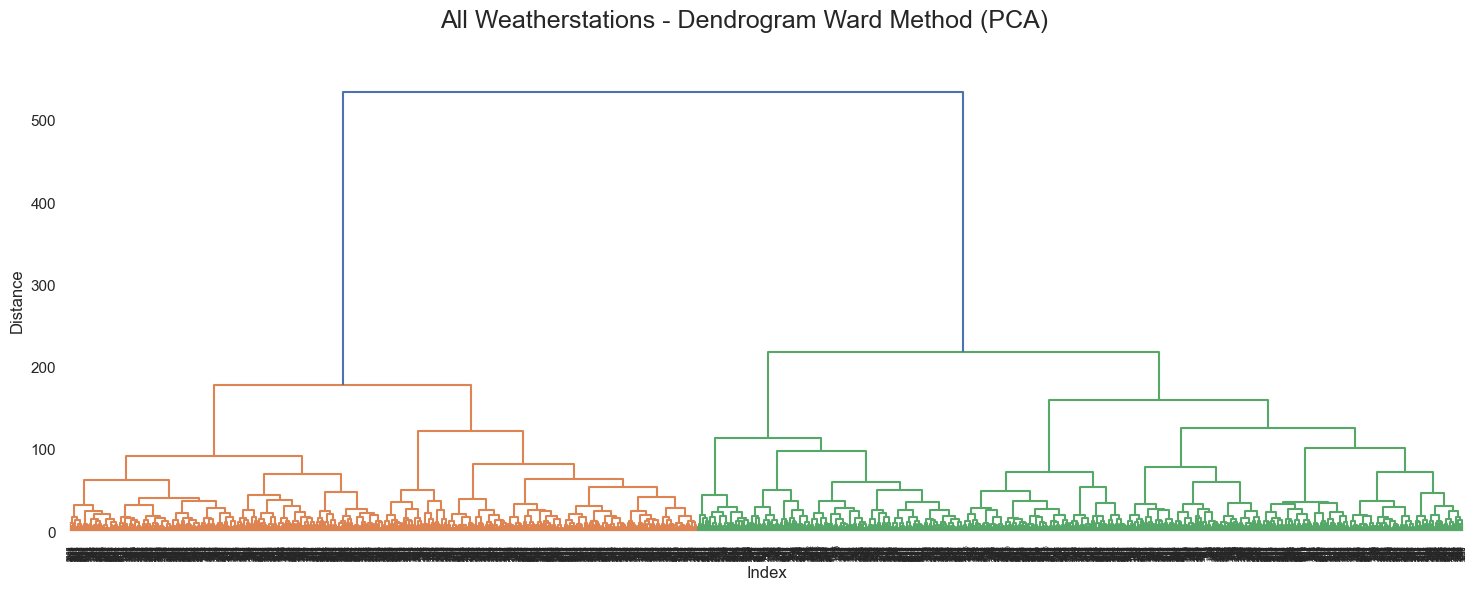

In [ ]:
distance_ward = linkage(dfPCA, method="ward")
plt.figure(figsize=(18,6))
dendrogram(distance_ward, leaf_rotation=90)
plt.xlabel('Index')
plt.ylabel('Distance')
plt.suptitle("All Weatherstations - Dendrogram Ward Method (PCA)",fontsize=18)

# Display the plot
plt.show()

# Output PCA

In [34]:
dfPCA.to_csv(os.path.join(path, "Prepared", 'PCA.csv'))

In [35]:
path2 = r'D:\WORK\Bootcamp\Machine Learning\Achievement 2\2.1'

In [36]:
dfPCA.to_csv(os.path.join(path2, 'PCA.csv'))